# Introduction to Regression

In [13]:
from sklearn import datasets

In [14]:
boston = datasets.load_boston()

In [15]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [16]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [17]:
import pandas as pd

In [18]:
df = pd.DataFrame(boston['data'], columns=boston.feature_names)

In [22]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Creating feature and target arrays

In [23]:
X = boston.data
y = boston.target

In [34]:
X_rooms = X[:,5]

In [35]:
X_rooms.shape, y.shape

((506,), (506, 1))

In [36]:
X_rooms = X_rooms.reshape(-1, 1) # reshape(-1,1) means: keep first dimension and add another of size 1

In [37]:
y = y.reshape(-1, 1)

In [38]:
X_rooms.shape, y.shape

((506, 1), (506, 1))

In [43]:
import matplotlib.pyplot as plt

In [41]:
plt.style.use('ggplot')

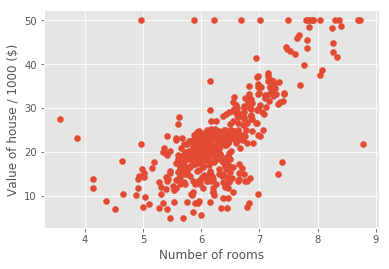

In [44]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house / 1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

The above plot allows us to observer that usually more rooms translate into higher prices.

## Fitting a regression model

In [46]:
import numpy as np
from sklearn import linear_model

In [47]:
reg = linear_model.LinearRegression()

In [48]:
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
# Check the regressor's prediction over the range of the data
prediction_space = np.linspace(min(X_rooms),
                               max(X_rooms))

In [54]:
prediction_space.shape

(50,)

In [55]:
prediction_space = prediction_space.reshape(-1, 1)

In [56]:
prediction_space.shape

(50, 1)

In [58]:
predictions = reg.predict(prediction_space)

In [59]:
predictions.shape

(50, 1)

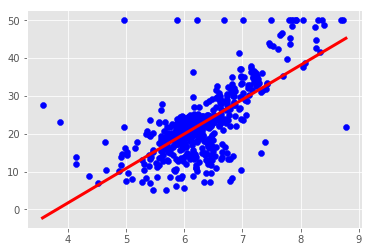

In [61]:
plt.scatter(X_rooms, y, color='blue') # actual data
plt.plot(prediction_space,
         reg.predict(prediction_space),
         color='red',
         linewidth=3)
plt.show()

The red line above displays the prediction model